# Importing the packages required

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

# For normalization
from sklearn.preprocessing import StandardScaler

# Import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE

# For splitting function 
from sklearn.model_selection import train_test_split

# Naive Bayes Machine learning library
from sklearn.naive_bayes import GaussianNB

# Import the metrics
from sklearn import metrics

# Import the classification_report from metrics
from sklearn.metrics import classification_report


# Reading the dataset

In [2]:
diabetes_data = pd.read_csv('pima-indians-diabetes.csv')

In [20]:
diabetes_data.shape

(768, 9)

# Overview of the dataset

In [3]:
diabetes_data.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabetes_data.tail()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_data.shape

(768, 9)

In [7]:
diabetes_data.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [9]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Analyzing the Data

<AxesSubplot:xlabel='class', ylabel='count'>

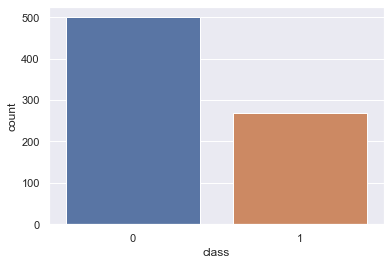

In [4]:

# countplot (shows the count of the class)
sns.countplot(x="class", data=diabetes_data)

array([[<AxesSubplot:title={'center':'Preg'}>,
        <AxesSubplot:title={'center':'Plas'}>,
        <AxesSubplot:title={'center':'Pres'}>],
       [<AxesSubplot:title={'center':'skin'}>,
        <AxesSubplot:title={'center':'test'}>,
        <AxesSubplot:title={'center':'mass'}>],
       [<AxesSubplot:title={'center':'pedi'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'class'}>]], dtype=object)

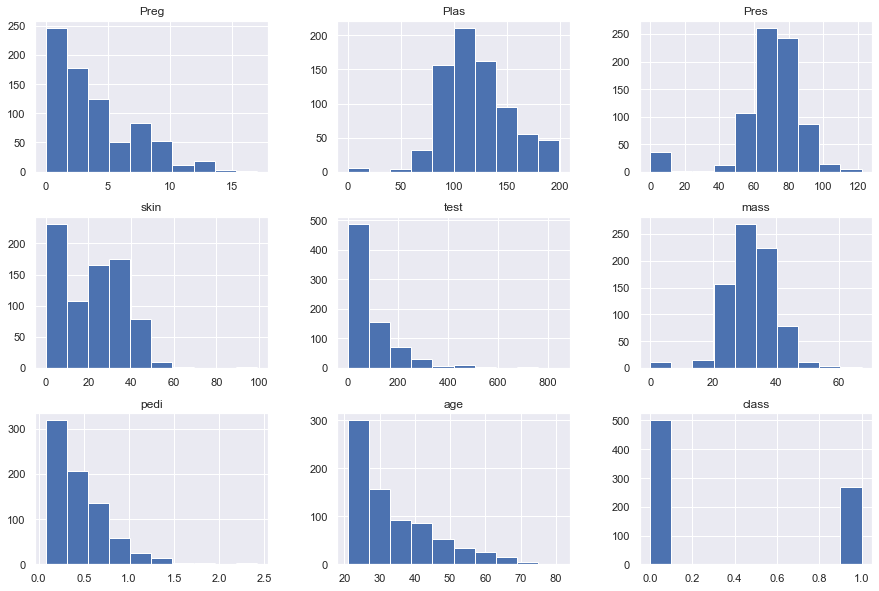

In [5]:
# Histogram
diabetes_data.hist(figsize=(15,10))

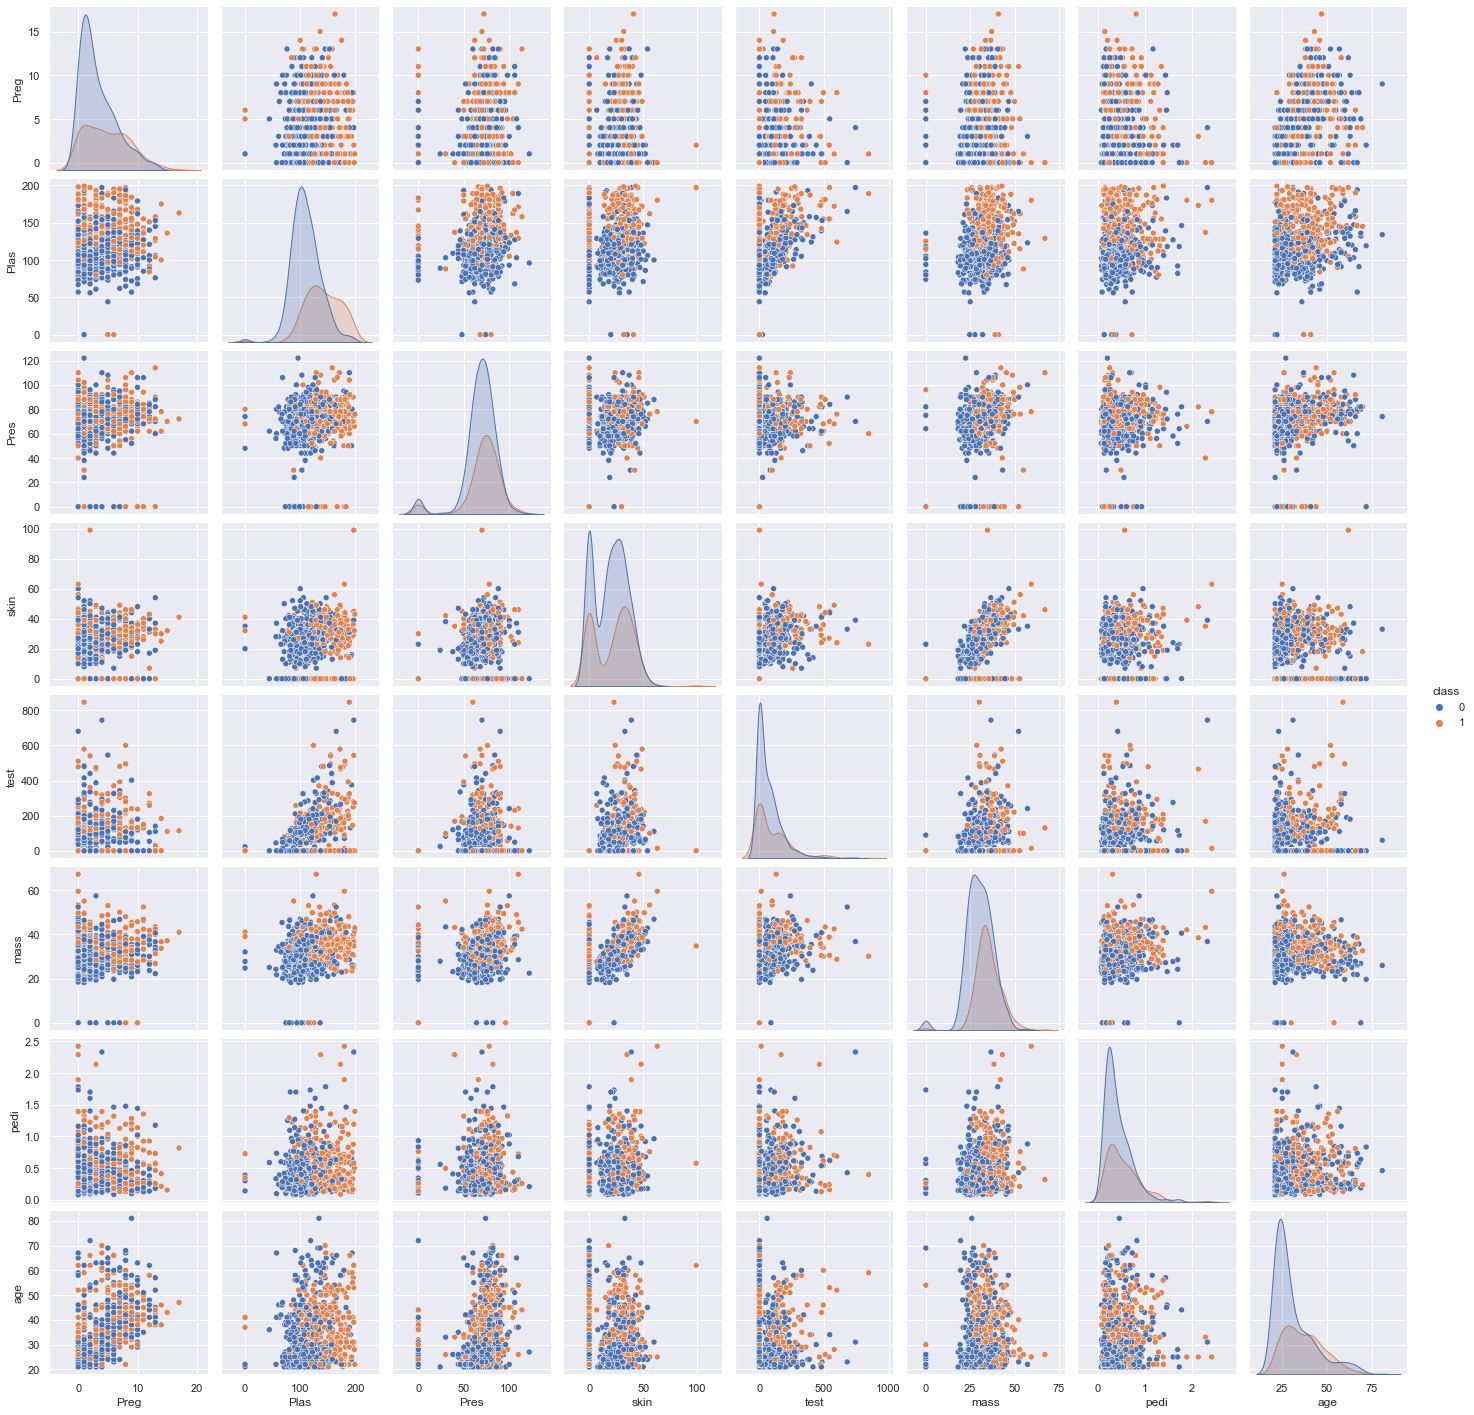

In [6]:
# scatter plot (which shows the relationship between the attributes)

sns.pairplot(diabetes_data, hue="class")

In [7]:
# correlation matrix

cor=diabetes_data.corr()
cor

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

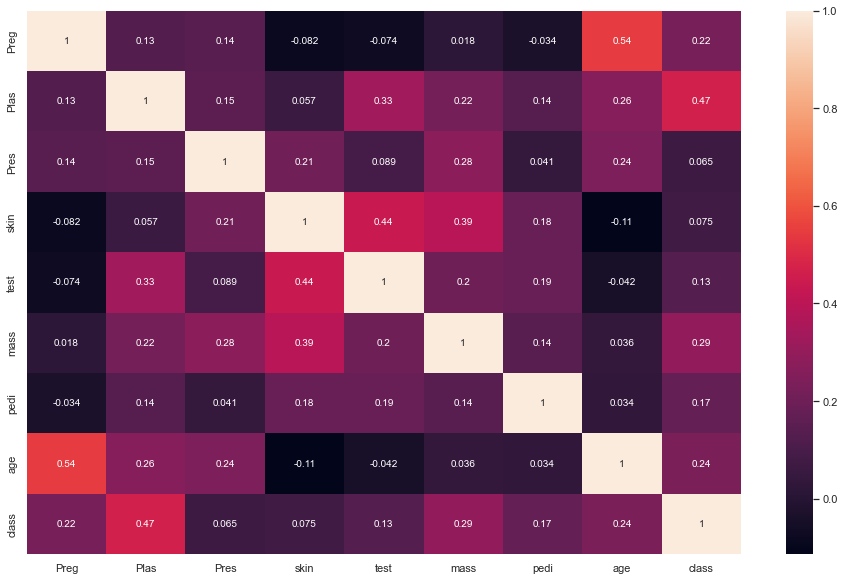

In [8]:
plt.figure(figsize = (16,10))
sns.heatmap(cor, annot=True)

# Data Wrangling

In [17]:
# Check the missing values in the dataset

diabetes_data.isnull().values.any()

False

It shows there are no null values but 0 is not considered in Null here but we know that 0 can also be the missing value, so we replace 0 by Nan

In [18]:
diabetes_data.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

Replacing 0 to NaN

In [19]:
data = diabetes_data[['Plas','Pres','skin','test','mass','pedi']]=diabetes_data[['Plas','Pres','skin','test','mass','pedi']].replace(0,np.nan)
data.head(15)

,Plas,Pres,skin,test,mass,pedi
0,148.0,72.0,35.0,NaN,33.6,0.627
1,85.0,66.0,29.0,NaN,26.6,0.351
2,183.0,64.0,NaN,NaN,23.3,0.672
3,89.0,66.0,23.0,94.0,28.1,0.167
4,137.0,40.0,35.0,168.0,43.1,2.288
5,116.0,74.0,NaN,NaN,25.6,0.201
6,78.0,50.0,32.0,88.0,31.0,0.248
7,115.0,NaN,NaN,NaN,35.3,0.134
8,197.0,70.0,45.0,543.0,30.5,0.158
9,125.0,96.0,NaN,NaN,NaN,0.232


In [20]:
data.isnull().sum()[['Plas','Pres','skin','test','mass','pedi']]

Plas      5
Pres     35
skin    227
test    374
mass     11
pedi      0
dtype: int64

Now replacing the NaN to median

In [21]:
diabetes_data['Plas'].fillna(diabetes_data['Plas'].median(),inplace=True)
diabetes_data['Pres'].fillna(diabetes_data['Pres'].median(),inplace=True)
diabetes_data['skin'].fillna(diabetes_data['skin'].median(),inplace=True)
diabetes_data['test'].fillna(diabetes_data['test'].median(),inplace=True)
diabetes_data['mass'].fillna(diabetes_data['mass'].median(),inplace=True)

diabetes_data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Heatmap, lines showing the null/0 values

<AxesSubplot:>

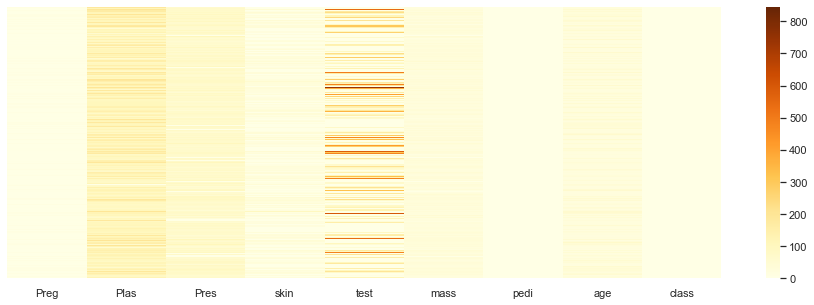

In [9]:
plt.figure(figsize = (16,5))
sns.heatmap(diabetes_data, yticklabels=False, cmap="YlOrBr")

Finding the max_age in the dataset

In [24]:
maxvalues = diabetes_data.max()
maxvalues

Preg      17.00
Plas     199.00
Pres     122.00
skin      99.00
test     846.00
mass      67.10
pedi       2.42
age       81.00
class      1.00
dtype: float64

Encoding the age

In [25]:
# Dividing the age into buckets

def age(df):
    df.loc[(df['age'] > 20) & (df['age'] <= 39), 'age'] = 1
    df.loc[(df['age'] > 40) & (df['age'] <= 59), 'age'] = 2
    df.loc[(df['age'] > 60) & (df['age'] <= 81), 'age'] = 3       
    return df
age(diabetes_data)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,2,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,1,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,1,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,3,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,1,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,1,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,2,1


# Model Building

Splitting the dataset

In [10]:
X= diabetes_data.drop("class", axis=1)
y= diabetes_data["class"]

In [11]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
columns=X_train.columns

Scaling

In [12]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Managing the imbalance class

In [25]:
Ov_sampling=SMOTE(random_state=0)

# now use SMOTE to oversample our train data which have features data_train_X and labels in data_train_y
ov_data_X,ov_data_y=Ov_sampling.fit_resample(X_train,y_train)
ov_data_X=pd.DataFrame(data=ov_data_X,columns=columns)
ov_data_y=pd.DataFrame(ov_data_y,columns=['class'])

In [14]:
print('length of oversampled data is   ',len(ov_data_X))
print('Number of no subscription in oversampled data ' ,len(ov_data_y[ov_data_y['class']==0]))
print('Number of subscription ' ,len(ov_data_y[ov_data_y['class']==1]))
print('Proportion of no subscription data in oversampled data is ' ,len(ov_data_y[ov_data_y['class']==0])/len(ov_data_X))
print('Proportion of subscription data in oversampled data is ' ,len(ov_data_y[ov_data_y['class']==1])/len(ov_data_X))

length of oversampled data is    708
Number of no subscription in oversampled data  354
Number of subscription  354
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [31]:
ov_data_y['class'].value_counts()

1    354
0    354
Name: class, dtype: int64

# Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
reg = DecisionTreeClassifier()
reg.fit(ov_data_X,ov_data_y)
pred = reg.predict(X_test)

d:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [35]:
reg.score(X_test, y_test)

d:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6666666666666666

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(ov_data_X,ov_data_y)
pred = clf.predict(X_test)

C:\Users\naras\AppData\Local\Temp\ipykernel_12488\459418303.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(ov_data_X,ov_data_y)
d:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [37]:
clf.score(X_test,y_test)

d:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8008658008658008

# SVM

In [38]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(ov_data_X,ov_data_y)
pred = clf.predict(X_test)

d:\PYTHON\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [39]:
clf.score(X_test,y_test)

d:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.7705627705627706

# Naive Bayes Model

In [15]:
# invoke the Gaussian function and find the bestfit model on training data
model=GaussianNB()
model.fit(ov_data_X,ov_data_y)
pred = model.predict(X_test)

d:\PYTHON\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Evaluating the model's performance

In [40]:
model_score = model.score(X_test, y_test)
print('Model score :',model_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test,pred))

Model score : 0.7662337662337663
Confusion Matrix:
 [[111  35]
 [ 18  67]]


d:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


<AxesSubplot:>

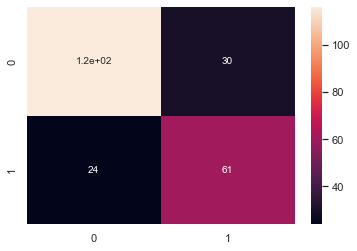

In [17]:
sns.heatmap(metrics.confusion_matrix(y_test,pred), annot=True)

Measure performance of Naive Bayes by classification 

In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       146
           1       0.67      0.72      0.69        85

    accuracy                           0.77       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.77      0.77      0.77       231



In [19]:
print('Accuracy :',metrics.accuracy_score(y_test,pred))
print('Precision :',metrics.precision_score(y_test,pred))
# print('Recall :',metrics.recall_score(y_test,pred))
# print('F-score :',metrics.f1_score(y_test,pred))

Accuracy : 0.7662337662337663
Precision : 0.6703296703296703
